<img src="Imagenes/eda_fer.jpeg" alt="Imagen creada con inteligencia artificial y editada con Microsoft Paint" style="border-radius: 15px; width: 75%;">

*Imagen creada con inteligencia artificial*

## **INTRODUCCIÓN**

En este Jupyter Notebook se hará una visualización y un pequeño EDA del dataset “FER-2013”. Este dataset se empleará para entrenar el modelo que reconocerá   
la expresión facial. El significado del nombre "FER-2013" es: "Facial Expression Recognition 2013", o sea, "Reconocimiento de Expresiones Faciales 2013"    
y es un conjunto de datos utilizado para el reconocimiento de expresiones faciales que introducido durante la competencia de Kaggle  
"Challenges in Representation Learning: Facial Expression Recognition Challenge" en 2013.



## **BIBLIOTECAS USADAS:**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
import math


## **CARGA DEL DASET**

In [2]:
file_path = './datos/fer2013/fer2013.csv'
df = pd.read_csv(file_path)

## **PEQUEÑA VISUALIZACIÓN DEL DATA SET**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


>Vemos que hay 35,887 entradas o filas, es decir, 35,887 fotografías; ninguna columna tiene nulos."

In [4]:
print("Primeras filas del dataframe:")
df.head(5)

Primeras filas del dataframe:


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## **ESTUDIO DE LAS COLUMNAS** 
### La columna 'emotion', es la columna objetivo.

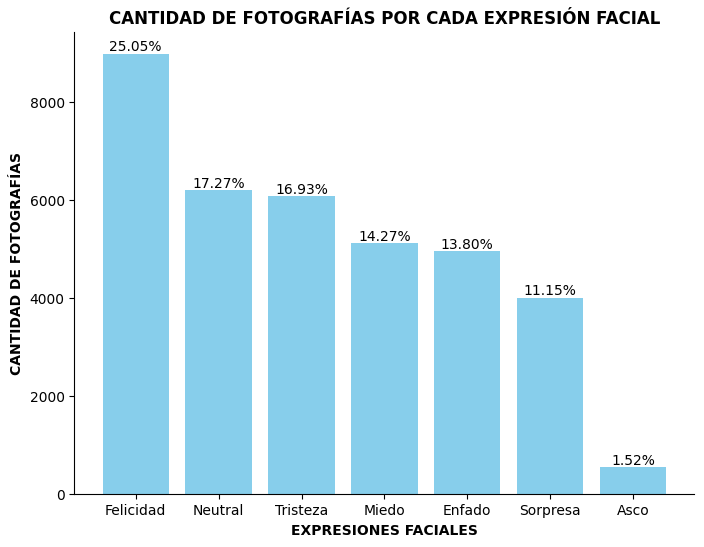

In [5]:

emotion_labels = {0: 'Enfado',1: 'Asco',2: 'Miedo',3: 'Felicidad',4: 'Tristeza',5: 'Sorpresa',6: 'Neutral'}

value_counts = df['emotion'].value_counts()
value_counts.index = value_counts.index.map(emotion_labels)
percentages = (value_counts / value_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts, color='skyblue')
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')
plt.title('CANTIDAD DE FOTOGRAFÍAS POR CADA EXPRESIÓN FACIAL', fontweight='bold')
plt.xlabel('EXPRESIONES FACIALES', fontweight='bold')
plt.ylabel('CANTIDAD DE FOTOGRAFÍAS', fontweight='bold')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks(rotation=0)  
plt.show()


In [6]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

>Este desbalanceo se estudiará de forma más individualizada al final.  
>
> Pese a que el etiquetado de las emociones está como números enteros en vez de cadenas no tendremos problemas, la emoción que corresponde a cada número/código es fácilmente accesible.    
ChatGPT conoce bien este dataset, además, buscando en Google es fácil encontrarlo.[ Aquí](https://www.kaggle.com/datasets/msambare/fer2013) dejo un enlace a Kaggle donde se puede ver.
>
>También vemos que no está balanceado; no todas las emociones tienen la misma cantidad de fotografías. Esto será tenido en cuenta en la fase de modelado. 
>  


### **Columna 'Usage'**
>Esta columna propone el uso (entrenamiento o uno de los dos test) para cada fila del dataframe, es decir, para cada fotografia.

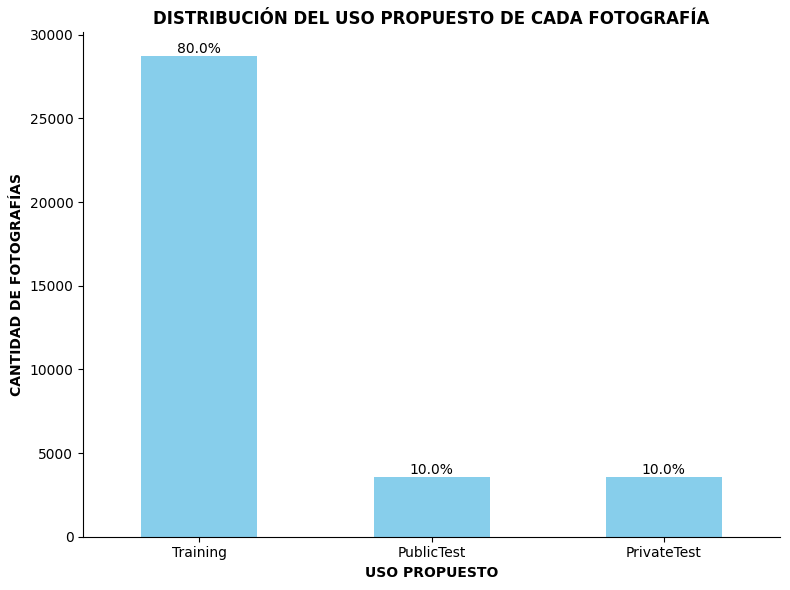

In [7]:
plt.figure(figsize=(8, 6))
value_counts = df['Usage'].value_counts()
percentages = value_counts / len(df) * 100
bars = value_counts.plot(kind='bar', color='skyblue')
plt.title('DISTRIBUCIÓN DEL USO PROPUESTO DE CADA FOTOGRAFÍA', fontweight='bold')
plt.xlabel('USO PROPUESTO', fontweight='bold')
plt.ylabel('CANTIDAD DE FOTOGRAFÍAS', fontweight='bold')
for i, (category, count) in enumerate(value_counts.items()):
    plt.text(i, count + 0.5, f'{percentages[category]:.1f}%', ha='center', va='bottom', fontsize=10)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

>"Vemos que prácticamente el ~80% de las fotografías están destinadas al train, estando el ~20% destinado a dos tests, de ~10% cada uno."


### **Columna 'pixels'**
> Esta columna está compuesta por cadenas (strings) de números, representando los colores de los píxeles.  
> Para el estudio de la columna nos centraremos en las características de las imágenes.


## **CARACTERISTICAS DE LAS IMAGENES**

In [9]:
# Obtener el tamaño en píxeles de las imágenes
df['num_pixels'] = df['pixels'].apply(lambda x: len(x.split()))

# Calcular estadísticas sobre el tamaño en píxeles
min_pixels = df['num_pixels'].min()
max_pixels = df['num_pixels'].max()


print(f"Tamaño mínimo de imagen en píxeles: {min_pixels}")
print(f"Tamaño máximo de imagen en píxeles: {max_pixels}")

print(f"Por lo que las imagenes son de {int(math.sqrt(max_pixels))}x{int(math.sqrt(max_pixels))} ")



Tamaño mínimo de imagen en píxeles: 2304
Tamaño máximo de imagen en píxeles: 2304
Por lo que las imagenes son de 48x48 


>Vemos que todas tienen el mismo tamaño.

In [10]:
ejemplo_pixels = df['pixels'].iloc[0] #Sabemos que todas las filas, tienen las misma caracteristicas, asi que cogemos una cualquiera.

# Dividimos la cadena de píxeles en valores individuales y convertimos a enteros
valores_pixeles = list(map(int, ejemplo_pixels.split()))

# Verificamos si todos los valores están dentro del rango de 0 a 255
todos_en_rango = all(0 <= pixel <= 255 for pixel in valores_pixeles)

if todos_en_rango:
    print("Las imágenes del dataset 'FER2013' son en escala de grises.")
else:
    print("Las imágenes del dataset 'FER2013' son a color (o tienen valores fuera del rango 0-255).")



Las imágenes del dataset 'FER2013' son en escala de grises.


## **VISUALIZACIÓN DE LAS IMAGENES**

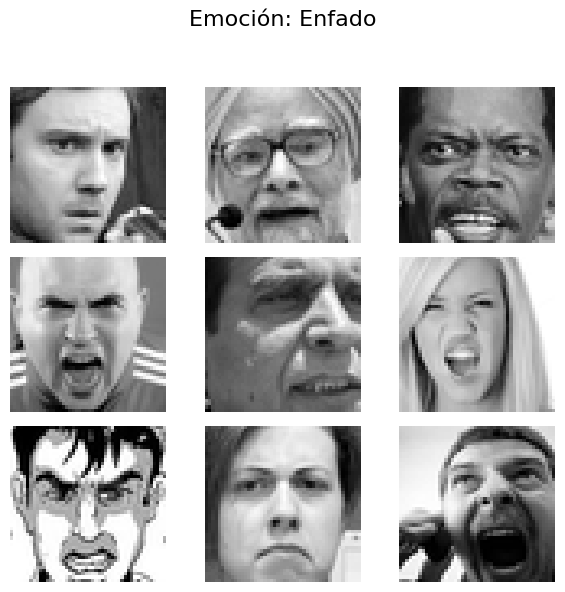

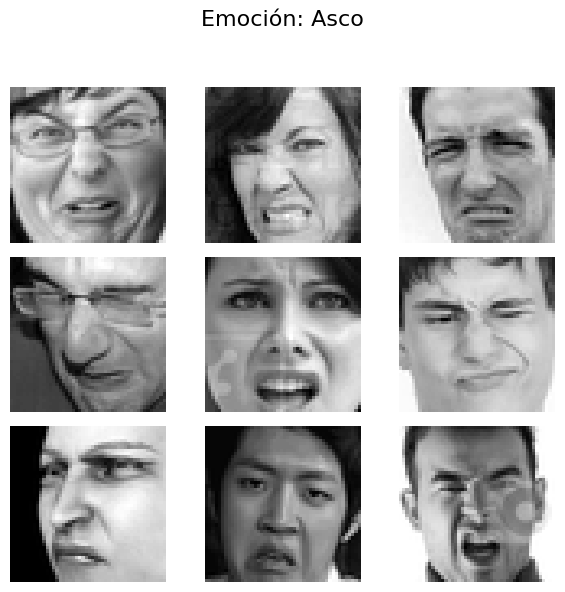

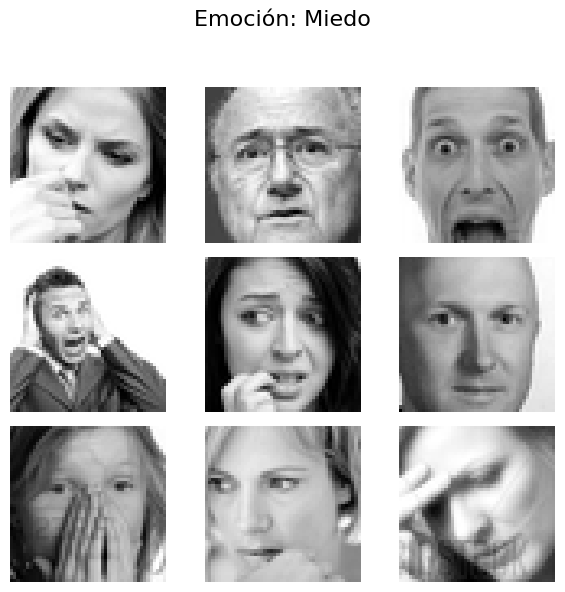

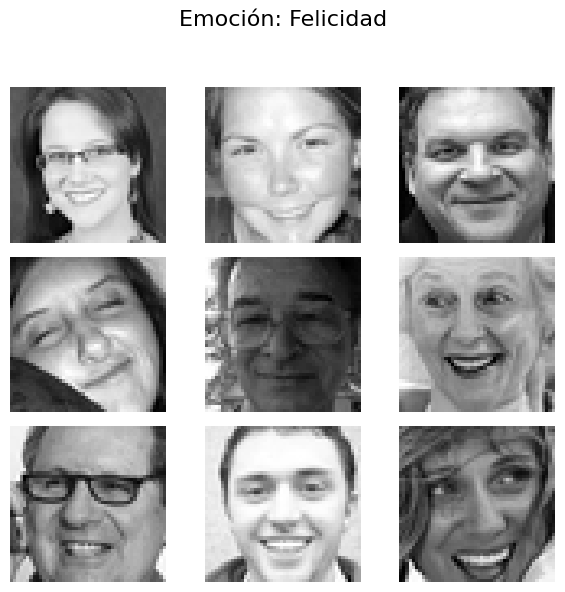

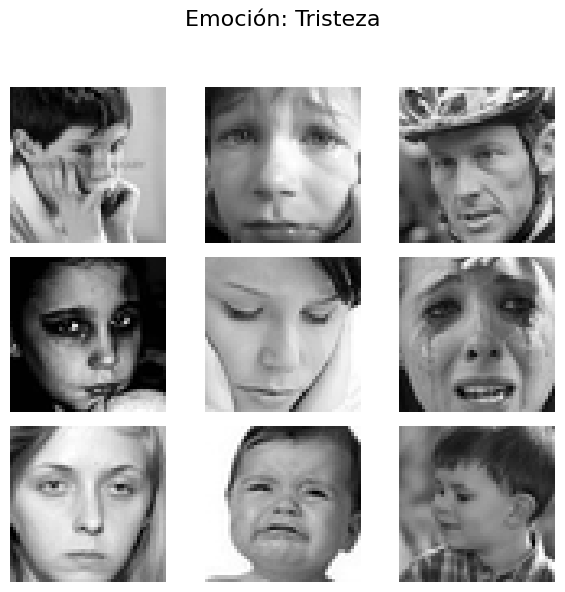

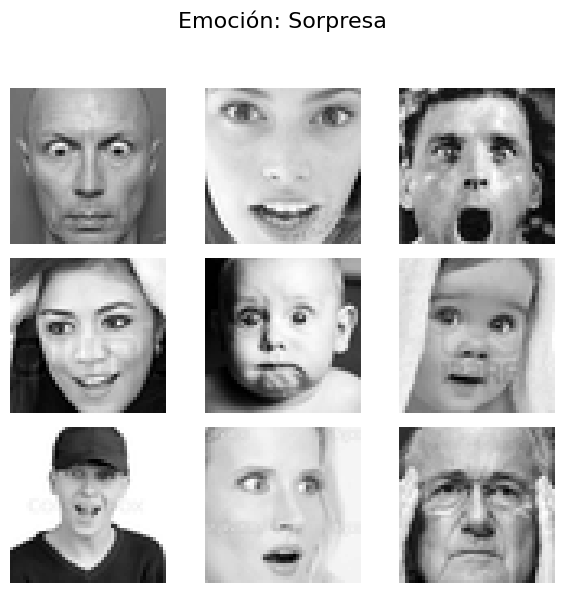

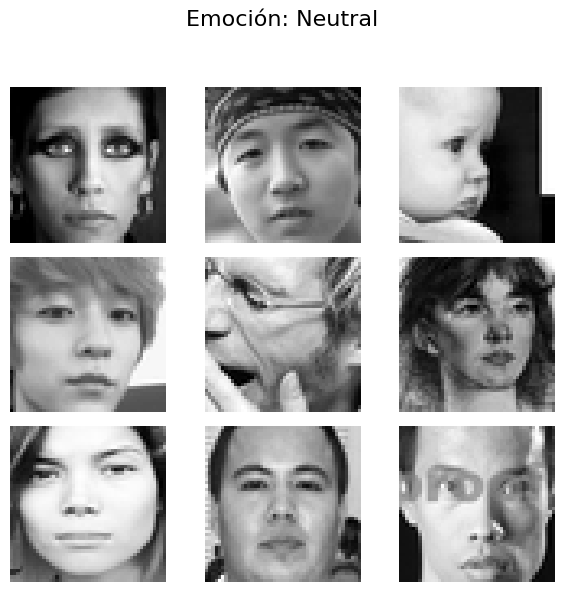

In [11]:
def mostrar_imagenes_emocion(emotion):
    filtered_df = df[df['emotion'] == emotion].head(9)

    # Configurar la visualización de las imágenes en 3 columnas
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
    fig.suptitle(f'Emoción: {emotion_labels[emotion]}', fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(filtered_df):
            pixels = np.array(filtered_df.iloc[i]['pixels'].split(), dtype='int').reshape(48, 48)
            ax.imshow(pixels, cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Ajustar el espacio para el título
    plt.show()

for emotion in range(7):  # Hay 7 emociones en total (0 a 6)
    mostrar_imagenes_emocion(emotion)

## **ESTUDIO INDIVIDUAL DE LA COLUMNA 'emotion' POR CADA USO** 
### **Esto es importante de cara al correcto balanceado.**

In [12]:
df_train = df[df['Usage'] == 'Training'].copy() #Usamos 'copy()' para evitar advertencias y asegurar modificaciones seguras en los DataFrames derivados.
df_test = df[df['Usage'] == 'PublicTest'].copy()
df_val = df[df['Usage'] == 'PrivateTest'].copy()


df_train.drop(columns=['num_pixels'], inplace=True)
df_test.drop(columns=['num_pixels'], inplace=True)
df_val.drop(columns=['num_pixels'], inplace=True) 

In [13]:
print("Número de filas en df_train:", len(df_train))
print("Número de filas en df_test:", len(df_test))
print("Número de filas en df_val:", len(df_val))

Número de filas en df_train: 28709
Número de filas en df_test: 3589
Número de filas en df_val: 3589


> **Vemos que efectivamente coincide con lo observado en el estudio del conjunto de datos original.**

## **TRAIN**

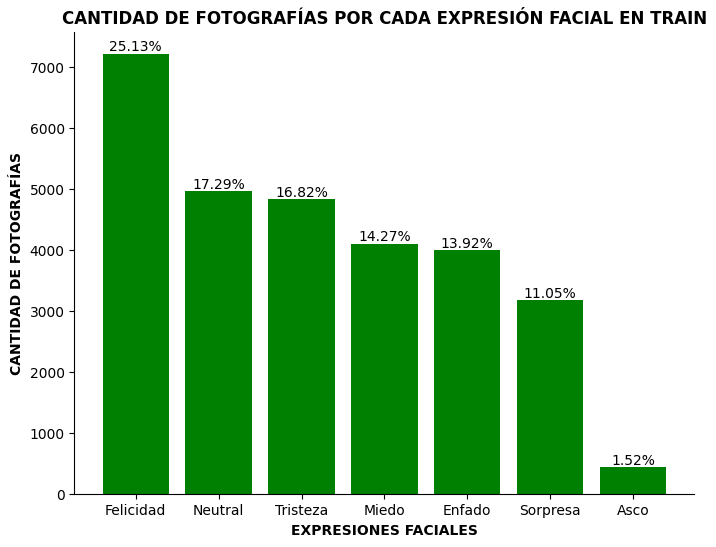

In [14]:
value_counts_train = df_train['emotion'].value_counts()
value_counts_train.index = value_counts_train.index.map(emotion_labels)
percentages_train = (value_counts_train / value_counts_train.sum()) * 100

plt.figure(figsize=(8, 6))
bars_train = plt.bar(value_counts_train.index, value_counts_train, color='GREEN')
for bar_train, percentage_train in zip(bars_train, percentages_train):
    height_train = bar_train.get_height()
    plt.text(bar_train.get_x() + bar_train.get_width() / 2, height_train, f'{percentage_train:.2f}%', ha='center', va='bottom')
plt.title('CANTIDAD DE FOTOGRAFÍAS POR CADA EXPRESIÓN FACIAL EN TRAIN', fontweight='bold')
plt.xlabel('EXPRESIONES FACIALES', fontweight='bold')
plt.ylabel('CANTIDAD DE FOTOGRAFÍAS', fontweight='bold')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks(rotation=0)  
plt.show()


## **TEST**

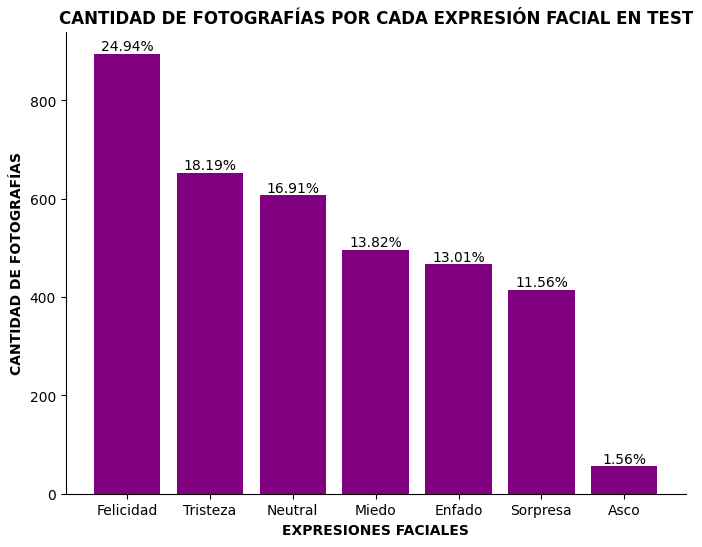

In [15]:
value_counts_test = df_test['emotion'].value_counts()
value_counts_test.index = value_counts_test.index.map(emotion_labels)
percentages_test = (value_counts_test / value_counts_test.sum()) * 100

plt.figure(figsize=(8, 6))
bars_test = plt.bar(value_counts_test.index, value_counts_test, color='PURPLE')
for bar_test, percentage_test in zip(bars_test, percentages_test):
    height_test = bar_test.get_height()
    plt.text(bar_test.get_x() + bar_test.get_width() / 2, height_test, f'{percentage_test:.2f}%', ha='center', va='bottom')
plt.title('CANTIDAD DE FOTOGRAFÍAS POR CADA EXPRESIÓN FACIAL EN TEST', fontweight='bold')
plt.xlabel('EXPRESIONES FACIALES', fontweight='bold')
plt.ylabel('CANTIDAD DE FOTOGRAFÍAS', fontweight='bold')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks(rotation=0)  
plt.show()

## **VALIDACIÓN**

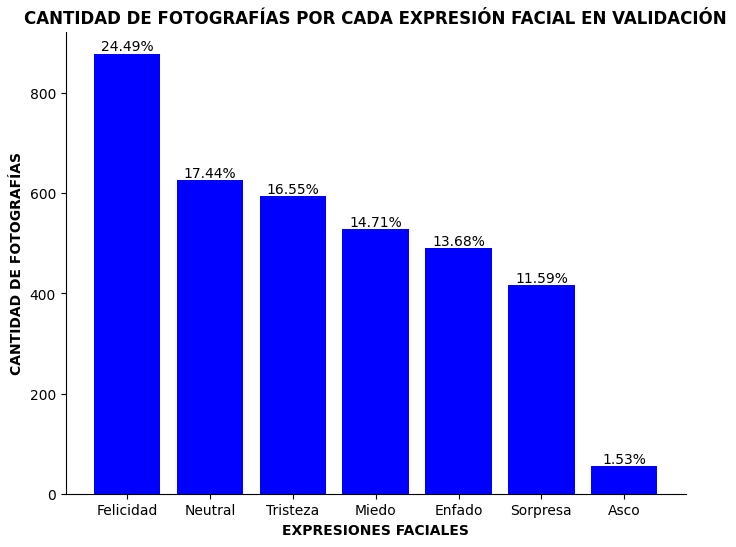

In [16]:
value_counts_val = df_val['emotion'].value_counts()
value_counts_val.index = value_counts_val.index.map(emotion_labels)
percentages_val = (value_counts_val / value_counts_val.sum()) * 100

plt.figure(figsize=(8, 6))
bars_val = plt.bar(value_counts_val.index, value_counts_val, color='blue')
for bar_val, percentage_val in zip(bars_val, percentages_val):
    height_val = bar_val.get_height()
    plt.text(bar_val.get_x() + bar_val.get_width() / 2, height_val, f'{percentage_val:.2f}%', ha='center', va='bottom')
plt.title('CANTIDAD DE FOTOGRAFÍAS POR CADA EXPRESIÓN FACIAL EN VALIDACIÓN', fontweight='bold')
plt.xlabel('EXPRESIONES FACIALES', fontweight='bold')
plt.ylabel('CANTIDAD DE FOTOGRAFÍAS', fontweight='bold')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xticks(rotation=0)  
plt.show()

## **TODOS**

In [17]:
print("El reparto en el dataset original:")
print(df['emotion'].value_counts(normalize=True) * 100) 
print()
print("El reparto en el dataset de entrenamiento:")
print(df_train['emotion'].value_counts(normalize=True) * 100)
print()
print("El reparto en el dataset de test:")
print(df_test['emotion'].value_counts(normalize=True) * 100)
print()
print("El reparto en el dataset de validación:")
print(df_val['emotion'].value_counts(normalize=True) * 100)

El reparto en el dataset original:
emotion
3    25.048068
6    17.270878
4    16.933709
2    14.269791
0    13.801655
5    11.151671
1     1.524229
Name: proportion, dtype: float64

El reparto en el dataset de entrenamiento:
emotion
3    25.131492
6    17.294228
4    16.823992
2    14.270786
0    13.915497
5    11.045317
1     1.518688
Name: proportion, dtype: float64

El reparto en el dataset de test:
emotion
3    24.937308
4    18.194483
6    16.912789
2    13.820006
0    13.011981
5    11.563110
1     1.560323
Name: proportion, dtype: float64

El reparto en el dataset de validación:
emotion
3    24.491502
6    17.442184
4    16.550571
2    14.711619
0    13.680691
5    11.590972
1     1.532460
Name: proportion, dtype: float64



> **Vemos que efectivamente están todos desbalanceados, pero el reparto es muy similar en los tres.**    
>**esto será tenido en cuenta en el proceso de 'data augmentation'.**

## **GUARDADO DE LOS DATASETS**
>**Para facilitar un poco las cosas en el notebook de 'data augmentation', guardaremos los datasets individuales.**

In [18]:
df_train.to_csv('datos/fer2013/dataframe_individuales/df_train.csv', index=False)
df_test.to_csv('datos/fer2013/dataframe_individuales/df_test.csv', index=False)
df_val.to_csv('datos/fer2013/dataframe_individuales/df_val.csv', index=False)


## **CONCLUSIÓN FINAL**

Hacer un análisis exploratorio de datos, EDA, suele ser habitual en datos tabulares y que sean 'fácilmente' analizables.  
En el caso de un dataset de fotografías puede resultar algo más complejo. Sin embargo, explorar la cantidad de fotografías   
de cada etiqueta, el tamaño de estas, los canales y en general la aproximación que hemos hecho en este notebook puede ser   
suficiente para entender las características del dataset "FER-2013".  

### Aspectos Explorados:
- **Etiquetas de Emoción:** Se identificaron 7 categorías emocionales en el dataset: Enfado, Asco, Miedo,   
Felicidad, Tristeza, Sorpresa y Neutral.
  
- **Tamaño del Dataset:** El dataset contiene un total de 35,887 imágenes, distribuidas principalmente en un conjunto de   
entrenamiento (28,709 imágenes) y dos conjuntos de pruebas (PublicTest y PrivateTest, cada uno con 3,589 imágenes).  

- **Características de las Imágenes:** Todas las imágenes están en escala de grises y tienen un tamaño fijo de 48x48 píxeles.

- **Distribución de Emociones:** Se observó que las emociones no están equilibradas en el dataset, con algunas emociones como  
Felicidad y Neutral teniendo una representación considerablemente mayor que otras como Asco y Sorpresa.  

### Conclusiones Adicionales:
- **Análisis de Intensidad de Píxeles:** Se verificó que todas las imágenes están en escala de grises y en el rango de valores  
de píxeles de 0 a 255, lo que confirma que el dataset está bien estructurado para su uso en modelos de aprendizaje automático.

- **Visualización de Imágenes:** Se proporcionó una visualización detallada de muestras aleatorias de imágenes para cada emoción,  
destacando las diferencias visuales en las expresiones faciales representadas.  

### Consideraciones Futuras:
- **Balance de Clases:** Dada la desigualdad en la distribución de emociones, será importante abordar estrategias de balanceo de  
clases durante el entrenamiento (o antes) del modelo para evitar sesgos y mejorar la capacidad predictiva del sistema.  
  
En resumen, este EDA proporciona una base sólida para la siguiente fase de desarrollo de modelos de reconocimiento de expresiones  
faciales, destacando áreas de enfoque para mejorar la precisión y la generalización del modelo.
